<a href="https://colab.research.google.com/github/Rafael-Barbosa/Perceptron_Adaline/blob/main/Rede_Neural_com_GD_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede Neural + Gradiente Descendente

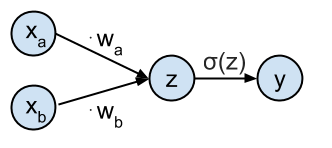

In [ ]:

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

import numpy as np  
import matplotlib
import matplotlib.pyplot as plt  
from matplotlib import cm 
from matplotlib.colors import colorConverter, ListedColormap
import seaborn as sns  

sns.set_style('darkgrid')

np.random.seed(seed=1)


In [ ]:

nb_of_samples_per_class = 20  
red_mean = (-1., 0.)  
blue_mean = (1., 0.)  

x_red = np.random.randn(nb_of_samples_per_class, 2) + red_mean
x_blue = np.random.randn(nb_of_samples_per_class, 2)  + blue_mean


X = np.vstack((x_red, x_blue))
t = np.vstack((np.zeros((nb_of_samples_per_class,1)), 
               np.ones((nb_of_samples_per_class,1))))


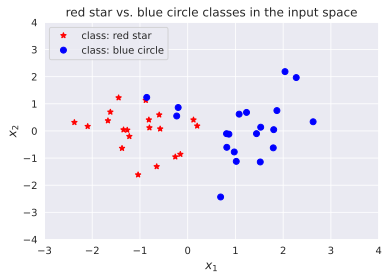

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='class: red star')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='class: blue circle')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.axis([-3, 4, -4, 4])
plt.title('red star vs. blue circle classes in the input space')
plt.show()

In [ ]:

def logistic(z): 
    return 1. / (1 + np.exp(-z))


def nn(x, w): 
    return logistic(x.dot(w.T))


def nn_predict(x,w): 
    return np.around(nn(x,w))
    

def loss(y, t):
    return - np.mean(
        np.multiply(t, np.log(y)) + np.multiply((1-t), np.log(1-y)))

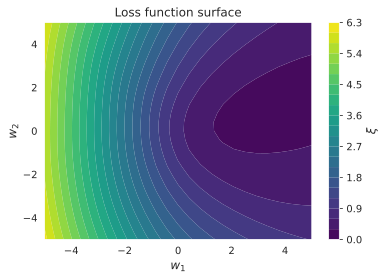

In [ ]:

nb_of_ws = 25 
wsa = np.linspace(-5, 5, num=nb_of_ws) 
wsb = np.linspace(-5, 5, num=nb_of_ws) 
ws_x, ws_y = np.meshgrid(wsa, wsb) 
loss_ws = np.zeros((nb_of_ws, nb_of_ws)) 

for i in range(nb_of_ws):
    for j in range(nb_of_ws):
        loss_ws[i,j] = loss(
            nn(X, np.asmatrix([ws_x[i,j], ws_y[i,j]])) , t)

plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('$\\xi$', fontsize=12)
plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Loss function surface')
plt.grid()
plt.show()


In [ ]:
def gradient(w, x, t):
    
    return (nn(x, w) - t).T * x

 
def delta_w(w_k, x, t, learning_rate):
    
    return learning_rate * gradient(w_k, x, t)

In [ ]:

w = np.asmatrix([-4, -2])  

learning_rate = 0.05


nb_of_iterations = 10  
w_iter = [w]  
for i in range(nb_of_iterations):
    dw = delta_w(w, X, t, learning_rate) 
    w = w - dw  
    w_iter.append(w)  

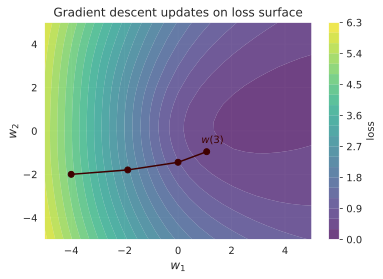

In [ ]:

plt.figure(figsize=(6, 4))
plt.contourf(ws_x, ws_y, loss_ws, 20, alpha=0.75, cmap=cm.viridis)
cbar = plt.colorbar()
cbar.ax.set_ylabel('loss')


for i in range(1, 4): 
    w1 = w_iter[i-1]
    w2 = w_iter[i]
    
    plt.plot(w1[0,0], w1[0,1], marker='o', color='#3f0000')  
    plt.plot([w1[0,0], w2[0,0]], [w1[0,1], w2[0,1]], linestyle='-', color='#3f0000')

w1 = w_iter[3]  
plt.plot(w1[0,0], w1[0,1], marker='o', color='#3f0000')
plt.text(w1[0,0]-0.2, w1[0,1]+0.4, f'$w({i})$', color='#3f0000') 

plt.xlabel('$w_1$', fontsize=12)
plt.ylabel('$w_2$', fontsize=12)
plt.title('Gradient descent updates on loss surface')
plt.show()


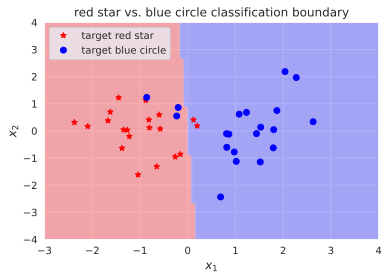

In [ ]:

plt.figure(figsize=(6, 4))

nb_of_xs = 100
xsa = np.linspace(-4, 4, num=nb_of_xs)
xsb = np.linspace(-4, 4, num=nb_of_xs)
xx, yy = np.meshgrid(xsa, xsb) 

classification_plane = np.zeros((nb_of_xs, nb_of_xs))
for i in range(nb_of_xs):
    for j in range(nb_of_xs):
        classification_plane[i,j] = nn_predict(
            np.asmatrix([xx[i,j], yy[i,j]]) , w)

cmap = ListedColormap([
        colorConverter.to_rgba('r', alpha=0.3),
        colorConverter.to_rgba('b', alpha=0.3)])


plt.contourf(xx, yy, classification_plane, cmap=cmap)
plt.plot(x_red[:,0], x_red[:,1], 'r*', label='target red star')
plt.plot(x_blue[:,0], x_blue[:,1], 'bo', label='target blue circle')
plt.legend(loc=2)
plt.xlabel('$x_1$', fontsize=12)
plt.ylabel('$x_2$', fontsize=12)
plt.title('red star vs. blue circle classification boundary')
plt.axis([-3, 4, -4, 4])
plt.show()